# Imports

In [38]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Config
sns.set_theme(style="darkgrid")
sns.set()

# Open file

In [39]:
df = pd.read_csv("../data/clear_data.csv")

In [40]:
df.head()

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,published_at,remote_interview,remote,contract_type,salary_min,salary_max,currency,technology,levels
0,Lead Full-Stack Developer (React + Java),Warszawa,PL,javascript,remote,Efisco,10-35,senior,52.229375,21.013196,2021-02-26T19:52:00.000Z,True,True,b2b,4000.0,8000.0,usd,"['Java', 'SQL', 'React']","[4, 5, 5]"
1,Data Engineer,Katowice,PL,analytics,office,STS,1500,mid,50.264892,19.023781,2021-02-26T19:11:50.507Z,True,False,permanent,NaN,NaN,NaN,"['MySQL', 'Apache Kafka', 'Python']","[3, 3, 4]"
2,DevOps Engineer,Katowice,PL,devops,office,STS,1500,mid,50.251405,19.050230,2021-02-26T19:03:39.277Z,True,False,permanent,NaN,NaN,NaN,"['Bash', 'Python', 'Linux (Debian)']","[3, 3, 4]"
3,Senior Jakarta EE Developer,Warszawa,PL,java,remote,super devs,50,senior,52.183231,21.025169,2021-02-26T19:00:07.492Z,True,True,b2b,18000.0,24000.0,pln,"['Hibernate', 'Jakarta EE', 'Polish']","[5, 5, 5]"
4,Senior UX Designer,Kraków,PL,ux,remote,Netguru,600,senior,50.069879,19.946371,2021-02-26T19:00:07.492Z,False,True,b2b,NaN,NaN,NaN,[],[]


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3745 entries, 0 to 3744
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3745 non-null   object 
 1   city              3745 non-null   object 
 2   country_code      3745 non-null   object 
 3   marker_icon       3745 non-null   object 
 4   workplace_type    3745 non-null   object 
 5   company_name      3745 non-null   object 
 6   company_size      3745 non-null   object 
 7   experience_level  3745 non-null   object 
 8   latitude          3745 non-null   float64
 9   longitude         3745 non-null   float64
 10  published_at      3745 non-null   object 
 11  remote_interview  3745 non-null   bool   
 12  remote            3745 non-null   bool   
 13  contract_type     3745 non-null   object 
 14  salary_min        2790 non-null   float64
 15  salary_max        2790 non-null   float64
 16  currency          2790 non-null   object 


# Salary Target

In [42]:
df['salary_min'].isna().sum()
df = df.dropna()

# City

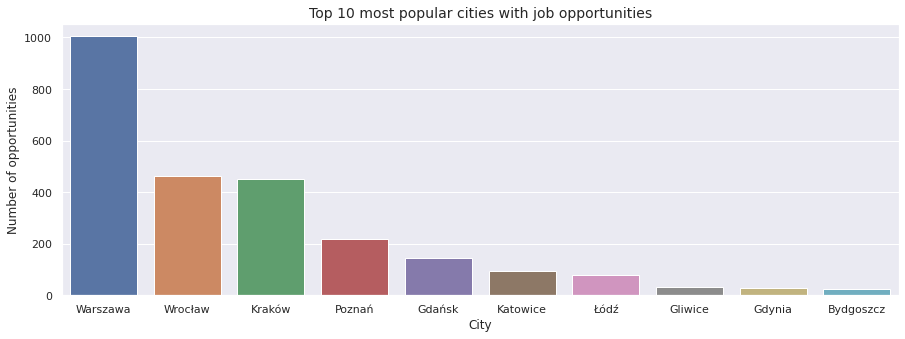

In [43]:
# Get first ten cities from column 'city'
city = df['city'].value_counts()[:10]

# Plotting a bar graph
plt.figure(figsize=(15,5))
sns.barplot(x=city.index, y=city.values)

# Simple config
plt.title("Top 10 most popular cities with job opportunities", fontsize=14)
plt.ylabel("Number of opportunities")
plt.xlabel("City")
plt.show()

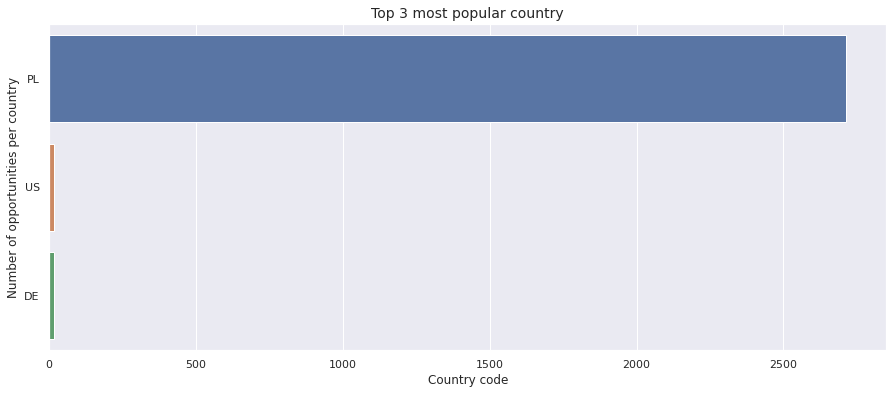

In [44]:
countries = df['country_code'].value_counts()[:3]


# Plotting a bar graph
plt.figure(figsize=(15,6))
sns.barplot(y=countries.index, x=countries.values, orient="h")

# Simple config
plt.title("Top 3 most popular country", fontsize=14)
plt.ylabel("Number of opportunities per country")
plt.xlabel("Country code")
plt.show()

In [45]:
df = df.loc[df['country_code'] == "PL"]

# Technologies

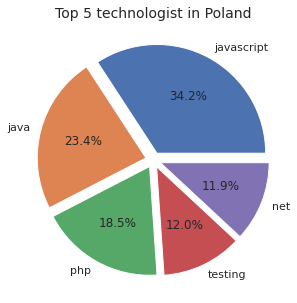

In [46]:
technologies = df['marker_icon'].value_counts()[:5]

plt.figure(figsize=(10,5))
plt.pie(x=technologies.values, labels=technologies.index, explode=[0.07]*5, autopct="%.1f%%")
plt.title("Top 5 technologist in Poland", fontsize=14)
plt.show()

In [47]:
df.head(1)

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,published_at,remote_interview,remote,contract_type,salary_min,salary_max,currency,technology,levels
0,Lead Full-Stack Developer (React + Java),Warszawa,PL,javascript,remote,Efisco,10-35,senior,52.229375,21.013196,2021-02-26T19:52:00.000Z,True,True,b2b,4000.0,8000.0,usd,"['Java', 'SQL', 'React']","[4, 5, 5]"


In [77]:
skills = []
import ast

def get_skill(x):
    x = ast.literal_eval(x)
    for num_skills in range(len(x)):
        try:
            skills.append(x[num_skills])
        except:
            continue
    return skills

df['technology'].apply(lambda x: get_skill(x))

0       [Java, SQL, React, Hibernate, Jakarta EE, Poli...
3       [Java, SQL, React, Hibernate, Jakarta EE, Poli...
5       [Java, SQL, React, Hibernate, Jakarta EE, Poli...
6       [Java, SQL, React, Hibernate, Jakarta EE, Poli...
7       [Java, SQL, React, Hibernate, Jakarta EE, Poli...
                              ...                        
3737    [Java, SQL, React, Hibernate, Jakarta EE, Poli...
3739    [Java, SQL, React, Hibernate, Jakarta EE, Poli...
3740    [Java, SQL, React, Hibernate, Jakarta EE, Poli...
3742    [Java, SQL, React, Hibernate, Jakarta EE, Poli...
3743    [Java, SQL, React, Hibernate, Jakarta EE, Poli...
Name: technology, Length: 2714, dtype: object

In [79]:
unique_skills = set(skills)
print(len(unique_skills))

1009


# Workplace vs. COVID-19

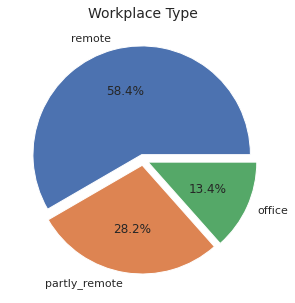

In [12]:
df_workplace = df['workplace_type'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(x=df_workplace.values, labels=df_workplace.index, explode=[0.05]*3, autopct="%.1f%%")
plt.title("Workplace Type", fontsize=14)
plt.show()

# Company size

In [13]:
df['company_size']

0       10-35
3          50
5        650+
6        650+
7          50
        ...  
3737       >5
3739     1-20
3740     2-10
3742    10-20
3743     7-10
Name: company_size, Length: 2714, dtype: object

In [14]:
def clear_data(x):
    x = x.split('-')[0]
    x = re.sub('[-+<>,.]', '', x)
    x = x.replace(' ', '')
    if x == '':
        x = x.replace('', '0')
    x = int(x)
    return x

def categorize_company_size(x):
    if x < 100:
        return 0
    elif x > 100 and x < 1000:
        return 1
    else: 
        return 2

In [15]:
df['company_size_feature'] = df['company_size'].apply(lambda x: clear_data(x))

In [16]:
df['company_size_feature'] = df['company_size_feature'].apply(lambda x: categorize_company_size(x))
df.drop('company_size', axis=1)

,title,city,country_code,marker_icon,workplace_type,company_name,experience_level,latitude,longitude,published_at,remote_interview,remote,contract_type,salary_min,salary_max,currency,technology,levels,company_size_feature
0,Lead Full-Stack Developer (React + Java),Warszawa,PL,javascript,remote,Efisco,senior,52.229375,21.013196,2021-02-26T19:52:00.000Z,True,True,b2b,4000.0,8000.0,usd,"['Java', 'SQL', 'React']","[4, 5, 5]",0
3,Senior Jakarta EE Developer,Warszawa,PL,java,remote,super devs,senior,52.183231,21.025169,2021-02-26T19:00:07.492Z,True,True,b2b,18000.0,24000.0,pln,"['Hibernate', 'Jakarta EE', 'Polish']","[5, 5, 5]",0
5,Senior Design Consultant,Poznań,PL,ux,remote,Netguru,senior,52.412067,16.938363,2021-02-26T19:00:07.492Z,True,True,b2b,12000.0,18600.0,pln,[],[],1
6,"Design Consultant (Strategy, Workshops)",Poznań,PL,ux,remote,Netguru,mid,52.412067,16.938363,2021-02-26T19:00:07.492Z,True,True,b2b,7000.0,12000.0,pln,[],[],1
7,Senior Python Developer Remote,Warszawa,PL,python,remote,Super Devs,senior,52.183388,21.025384,2021-02-26T19:00:07.492Z,True,True,b2b,19000.0,24000.0,pln,"['Python', 'ETL', 'Polish']","[4, 5, 5]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,Regular Javascript Developer,Łódź,PL,javascript,remote,Appstract,mid,51.772908,19.443911,2021-01-29T18:03:00.000Z,True,True,b2b,7000.0,14000.0,pln,"['Node.js Express', 'JavaScript / ES6', 'HTML5...","[3, 3, 3]",0
3739,Front-end Software Engineer,Warszawa,PL,javascript,remote,iRekruter,mid,52.169845,21.015508,2021-01-29T15:34:00.000Z,True,True,permanent,16000.0,18000.0,pln,"['JavaScript', 'English', 'Front-End']","[3, 4, 4]",0
3740,DevOps Engineer,Poznań,PL,devops,partly_remote,<exioo>,mid,52.414024,16.900846,2021-01-29T14:09:00.000Z,True,False,b2b,8000.0,16000.0,pln,"['AWS', 'Linux', 'DevOps']","[3, 3, 3]",0
3742,DevOps/SysAdmin,Poznań,PL,devops,office,GH,mid,52.399609,16.895801,2021-01-28T14:54:00.000Z,True,False,b2b,8000.0,14000.0,pln,"['TCP', 'Cloudflare', 'MySQL']","[3, 3, 4]",0


# Experience Level

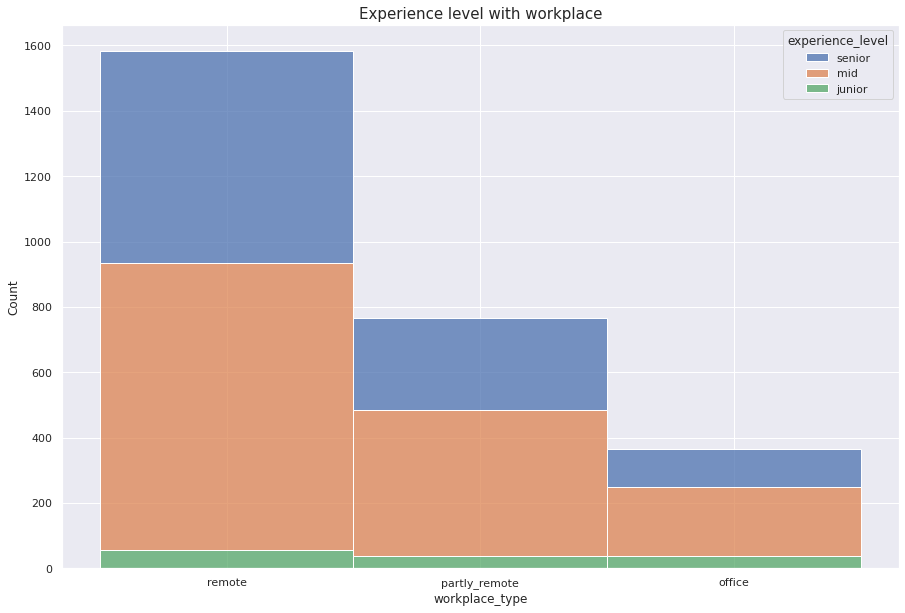

In [17]:
plt.figure(figsize=(15,10))

sns.histplot(
    df,
    x="workplace_type", hue="experience_level",
    multiple="stack",
);

plt.title("Experience level with workplace", fontsize=15.0);

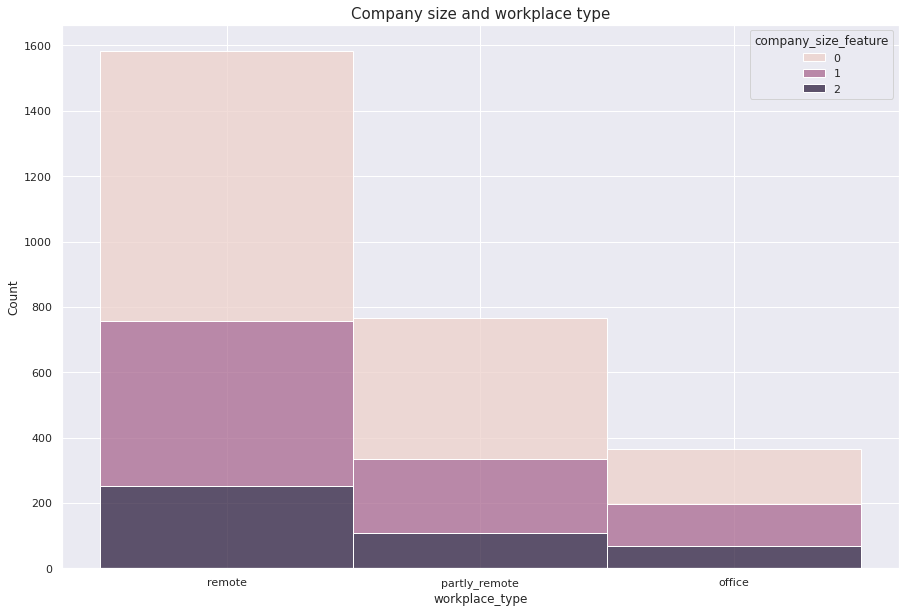

In [18]:
plt.figure(figsize=(15,10))

sns.histplot(
    df,
    x="workplace_type", hue="company_size_feature",
    multiple="stack",
);

plt.title("Company size and workplace type", fontsize=15.0);

# Salary

In [19]:
df['salary_mean'] = df[['salary_min', 'salary_max']].mean(axis=1)

## Convert to EUR, USD to PLN

In [20]:
df['currency'].value_counts()

pln    2693
usd      14
eur       7
Name: currency, dtype: int64

In [21]:
currency = {"usd": 3.70,
            "eur": 4.50,
            "gbp": 5.21,
            "chf": 4.12,
            "pln" : 1.0
           }

In [22]:
df = df.replace({"currency": currency})

In [23]:
df['salary_mean'] = df['salary_mean'] * df['currency']

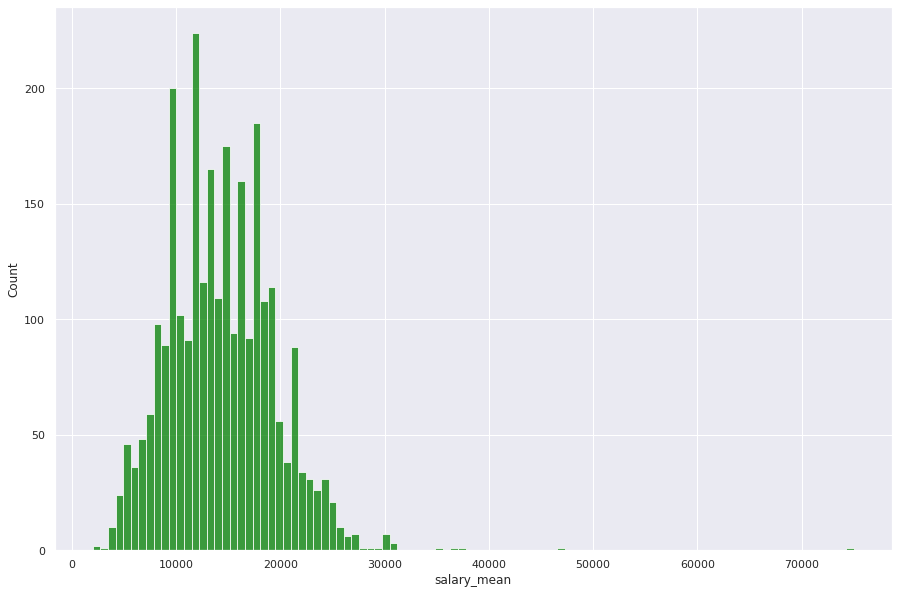

In [24]:
plt.figure(figsize=(15,10))

sns.histplot(df['salary_mean'], bins=100, color="green");

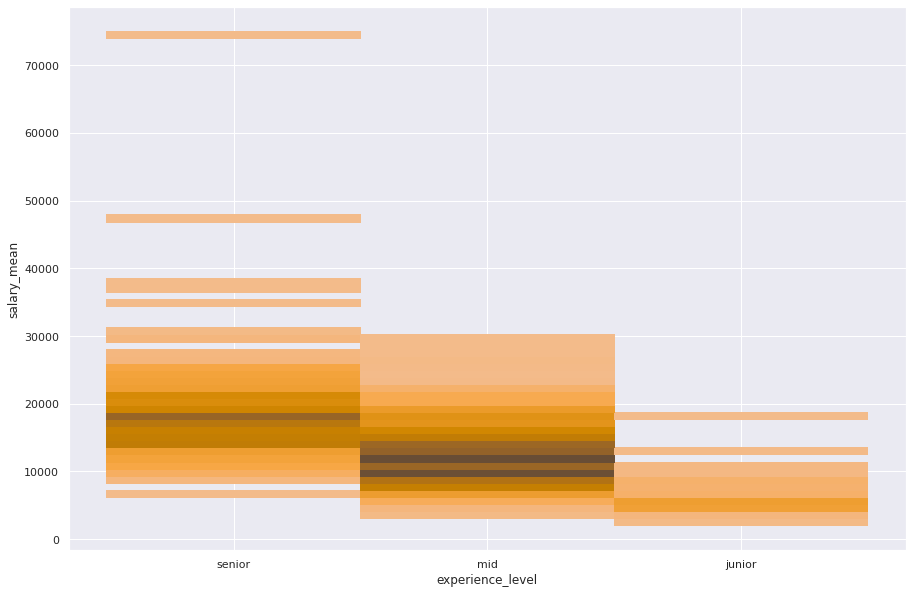

In [25]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='experience_level', y='salary_mean', color="orange");

# Create numerical data

In [26]:
df.head()

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,...,remote_interview,remote,contract_type,salary_min,salary_max,currency,technology,levels,company_size_feature,salary_mean
0,Lead Full-Stack Developer (React + Java),Warszawa,PL,javascript,remote,Efisco,10-35,senior,52.229375,21.013196,...,True,True,b2b,4000.0,8000.0,3.7,"['Java', 'SQL', 'React']","[4, 5, 5]",0,22200.0
3,Senior Jakarta EE Developer,Warszawa,PL,java,remote,super devs,50,senior,52.183231,21.025169,...,True,True,b2b,18000.0,24000.0,1.0,"['Hibernate', 'Jakarta EE', 'Polish']","[5, 5, 5]",0,21000.0
5,Senior Design Consultant,Poznań,PL,ux,remote,Netguru,650+,senior,52.412067,16.938363,...,True,True,b2b,12000.0,18600.0,1.0,[],[],1,15300.0
6,"Design Consultant (Strategy, Workshops)",Poznań,PL,ux,remote,Netguru,650+,mid,52.412067,16.938363,...,True,True,b2b,7000.0,12000.0,1.0,[],[],1,9500.0
7,Senior Python Developer Remote,Warszawa,PL,python,remote,Super Devs,50,senior,52.183388,21.025384,...,True,True,b2b,19000.0,24000.0,1.0,"['Python', 'ETL', 'Polish']","[4, 5, 5]",0,21500.0


In [27]:
# Remove columns

columns_to_drop = ['company_name', 
           'company_size',
           'salary_min',
           'salary_max',
           'currency',
           'published_at',
           'longitude',
           'latitude', 
           'remote_interview', 
           'remote',
           'technology',
           'levels', 'title','country_code']

df = df.drop(columns_to_drop, axis=1)

In [28]:
df.head()

,city,marker_icon,workplace_type,experience_level,contract_type,company_size_feature,salary_mean
0,Warszawa,javascript,remote,senior,b2b,0,22200.0
3,Warszawa,java,remote,senior,b2b,0,21000.0
5,Poznań,ux,remote,senior,b2b,1,15300.0
6,Poznań,ux,remote,mid,b2b,1,9500.0
7,Warszawa,python,remote,senior,b2b,0,21500.0


In [29]:
df.to_csv("../data/clear_output_data.csv", index=False)

In [30]:
df = pd.read_csv('../data/clear_output_data.csv')

In [31]:
df['city'] = df['city'].astype('category')
df['city'] = df['city'].cat.codes

df['marker_icon'] = df['marker_icon'].astype('category')
df['marker_icon'] = df['marker_icon'].cat.codes

df = pd.get_dummies(df, columns=['workplace_type', 'experience_level', 'contract_type'], prefix="feature")

In [32]:
df.head()

,city,marker_icon,company_size_feature,salary_mean,feature_office,feature_partly_remote,feature_remote,feature_junior,feature_mid,feature_senior,feature_b2b,feature_mandate_contract,feature_permanent
0,38,8,0,22200.0,0,0,1,0,0,1,1,0,0
1,38,7,0,21000.0,0,0,1,0,0,1,1,0,0
2,24,21,1,15300.0,0,0,1,0,0,1,1,0,0
3,24,21,1,9500.0,0,0,1,0,1,0,1,0,0
4,38,14,0,21500.0,0,0,1,0,0,1,1,0,0


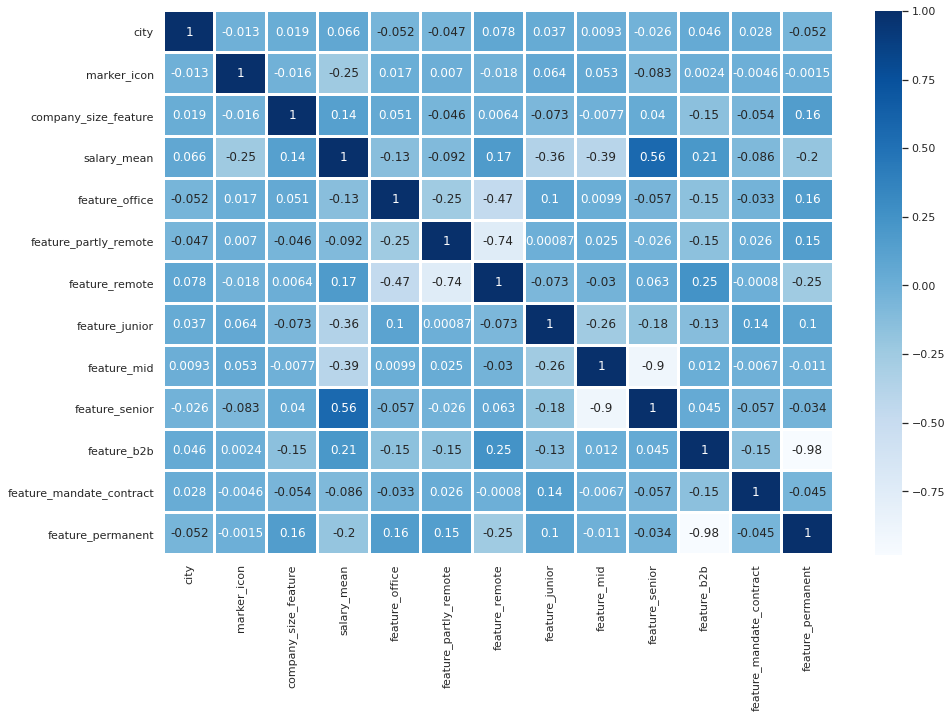

In [35]:
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, linewidths=2, cmap="Blues");

In [36]:
df.to_csv("../data/numerical_df", index=False)